In [51]:
%matplotlib inline
import pandas as pd #for datasets management
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
#el archivo debe estar en la misma dirección que el tester
db_original = 'exams.csv'
db = pd.read_csv(db_original)
db.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [ ]:
print(db.dtypes) #tipos de datos en cada una de las columnas
print(db.shape) #cantidad de filas y columnas

In [ ]:
pd.isnull(db).sum()

In [ ]:
db.columns

In [ ]:
db['test preparation course'].unique()

In [53]:
db_copy = db.copy()
db_copy.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [54]:
# cambios en los datos (cleaning):
# conversión de datos cualitativos
# a cuantitativos

# columna D: MES -> MES_new
db_copy['gender_new'] = db_copy['gender'].replace({'male': 1,
                                      'female': 2})

db_copy['race/ethnicity_new'] = db_copy['race/ethnicity'].replace({'group A': 1,
                                                     'group B': 2,
                                                     'group C': 3,
                                                     'group D': 4,
                                                     'group 5': 5})

db_copy.rename(columns = {'parental level of education': 'parental_level_of_education'}, inplace = True)
db_copy['parental_level_of_education_new'] = db_copy['parental_level_of_education'].replace({'some high school': 1,
                                                                                   'high school': 2,
                                                                                   'some college': 3,
                                                                                   "associate's degree": 4,
                                                                                   "bachelor's degree": 5,
                                                                                   "master's degree": 6})

db_copy['lunch_new'] = db_copy['lunch'].replace({'standard': 1,
                                       'free/reduced': 2})

db_copy.rename(columns = {'test preparation course': 'test_preparation_course'}, inplace = True)
db_copy['test_preparation_course_new'] = db_copy['test_preparation_course'].replace({'completed': 1,
                                                                           'none': 2})

# Talk to me...

C:\Users\luisr\AppData\Local\Temp\ipykernel_14576\3438222549.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(db_copy.corr())


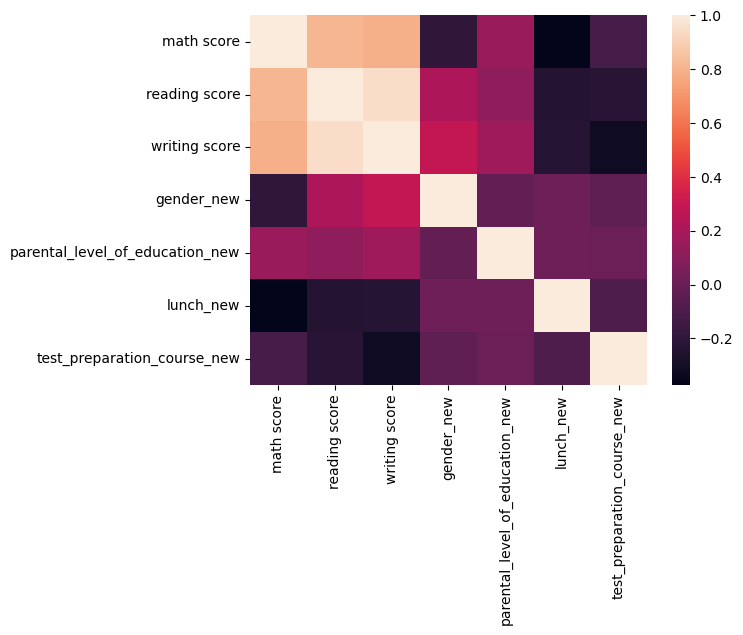

In [55]:
sns.heatmap(db_copy.corr())
plt.show()

Trabajo con la original porque con la copia no hay muchas correlacines

In [56]:
db.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [57]:
print(db.corr()) #correlaciones entre TODAS las variables
#print(db.corr()['INGRESOS_OPERACIONALES_2017']) #correlaciones entre variable determinada y todas las variables

               math score  reading score  writing score
math score       1.000000       0.811767       0.790055
reading score    0.811767       1.000000       0.948909
writing score    0.790055       0.948909       1.000000


C:\Users\luisr\AppData\Local\Temp\ipykernel_14576\1671848727.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(db.corr()) #correlaciones entre TODAS las variables


In [58]:
max_corr = pearsonr(db['writing score'], db['reading score']) #ingresos/patrimonio_17
print(max_corr)

PearsonRResult(statistic=0.9489088217740587, pvalue=0.0)
